EDA - Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


Breakdown of Objective - 
- Derive the Traget variable to Approve or Reject the loan based on the features 
- Identify the key features which can influence the decision on approving or rejecting the loan 
- Visualize and demonstrate on how features influence the desired output

The first step of the EDA process is to import all the key libraries as shown below,

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore') 

The data dictionary of the loan dataset is loaded here for reference

In [0]:
pip install install openpyxl

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_colwidth', -1)
pd.read_excel('Data_Dictionary.xlsx')

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


Now, lets understand the data further by displaying few records


In [0]:
pd.set_option('display.max_columns', None) #This option will help if the columns are trimmed in the display 
df=pd.read_csv('loan.csv')
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

The data dict provided in the excel is going to help to gain some level of domain knowledge , lets understand the data and its type using the info method in pandas

In [0]:
df.info(verbose=True, show_counts=True) #verbose and show_counts added because by default my IDE did not displayed the expected output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

The total number of rows x Columns

In [0]:
df.shape

(39717, 111)

By looking at the above stats, its evident more number of columns doesnt have any data , For example the total row count is 39717 but the columns like num_sats doesnt have any valid value , programatically finding the columns which doesnt have any valid values and removing is demonstrated below,


In [0]:
df.isna().sum()

id                                0    
member_id                         0    
loan_amnt                         0    
funded_amnt                       0    
funded_amnt_inv                   0    
term                              0    
int_rate                          0    
installment                       0    
grade                             0    
sub_grade                         0    
emp_title                         2459 
emp_length                        1075 
home_ownership                    0    
annual_inc                        0    
verification_status               0    
issue_d                           0    
loan_status                       0    
pymnt_plan                        0    
url                               0    
desc                              12940
purpose                           0    
title                             11   
zip_code                          0    
addr_state                        0    
dti                               0    


For a wider dataset where we have more columns, manually inspecting and removing the columns with more missing values is unrealistic, the programatic approch is to set the tolreance and remove the missing values based on the tolerance. For example ,Lets say 30% is the tolreance used for this dataset which means the column has 70% null values , the column with 70 % null values will be removed and considered as invalid feature

Introducting two new methods - count() and len() will be utilised to build a core logic, 
- df.somecolumn.count() - This would ignore the count of missing values - For ex NAN values and show only the count of valid records 
- len(df) - This would give us the length of the whole dataframe which is 39717 in our case 

For example - The column mths_since_last_record is dicarded because it has only 7% valid values 

- Calculation (df.mths_since_last_record.count()/len(df))*100 = (2786/39717)*100  = 7%
- This means 83% of the values are null values

In [0]:
l=len(df)
dropcols=[]
df2 = df[[column for column in df if df[column].count() / l >= 0.3]]
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        dropcols.append(c)
        print(f"column {c} is discarded because it has only {((df[c].count())/l)*100} % valid values!")
print('\n')
df = df2

List of dropped columns: column mths_since_last_record is discarded because it has only 7.0146284966135415 % valid values!
column next_pymnt_d is discarded because it has only 2.8703074250321023 % valid values!
column mths_since_last_major_derog is discarded because it has only 0.0 % valid values!
column annual_inc_joint is discarded because it has only 0.0 % valid values!
column dti_joint is discarded because it has only 0.0 % valid values!
column verification_status_joint is discarded because it has only 0.0 % valid values!
column tot_coll_amt is discarded because it has only 0.0 % valid values!
column tot_cur_bal is discarded because it has only 0.0 % valid values!
column open_acc_6m is discarded because it has only 0.0 % valid values!
column open_il_6m is discarded because it has only 0.0 % valid values!
column open_il_12m is discarded because it has only 0.0 % valid values!
column open_il_24m is discarded because it has only 0.0 % valid values!
column mths_since_rcnt_il is discard

The number of columns discarded by the above logic are,

In [0]:
len(dropcols)

56

The new shape is trimmed by 56 columns ,

In [0]:
df.shape

(39717, 55)

In [0]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

The next step is to manually inspect first few records , in our case I chose to display 20 records to get the glance of distribution. It appears the columns 'delinq_2yrs','pub_rec','initial_list_status','out_prncp','out_prncp_inv','collections_12_mths_ex_med','policy_code', 'application_type','acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies','tax_liens', 'url','desc','id','member_id' either have one static value like '0' or skewed or their distribution is not useful for insights. Lets verify the same programatically before removing these columns 

In [0]:
df.head(20)  

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>",other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075269,NaN,wedding,M

In [0]:
inspectfurther=['delinq_2yrs','pub_rec','initial_list_status','out_prncp','out_prncp_inv','collections_12_mths_ex_med','policy_code', 'application_type','acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies','tax_liens','url','desc','id','member_id','pymnt_plan']

Lets take the value counts and understand the distribution, this would help us to drop the columns which has only one static value without any distribution

In [0]:
for c in inspectfurther:
    print(df[c].value_counts())

0     35405
1     3303 
2     687  
3     220  
4     62   
5     22   
6     10   
7     4    
8     2    
9     1    
11    1    
Name: delinq_2yrs, dtype: int64
0    37601
1    2056 
2    51   
3    7    
4    2    
Name: pub_rec, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
0.00       38577
1972.60    2    
827.13     2    
2277.11    2    
2963.24    2    
          ..    
782.23     1    
2296.41    1    
1928.85    1    
1061.32    1    
79.24      1    
Name: out_prncp, Length: 1137, dtype: int64
0.00       38577
1972.60    2    
1664.64    2    
827.13     2    
1863.21    1    
          ..    
782.23     1    
2289.14    1    
1928.85    1    
1061.32    1    
79.24      1    
Name: out_prncp_inv, Length: 1138, dtype: int64
0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
1    39717
Name: policy_code, dtype: int64
INDIVIDUAL    39717
Name: application_type, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
0.0    39661
Name: chargeoff_w

**Analysis for Dropping the below columns** 
- 'initial_list_status' has only one value 'f' - No distribution in data , not an eligible candidate to use it as a feature
- 'collections_12_mths_ex_med' has only one value '0' - No distribution in data , not an eligible candidate to use it as a feature
- 'policy_code' has only one value '1' - No distribution in data , not an eligible candidate to use it as a feature
- 'application_type' has only one value 'INDIVIDUAL' - No distribution in data , not an eligible candidate to use it as a feature
- 'acc_now_delinq' has only one value '0' - No distribution in data , not an eligible candidate to use it as a feature
- 'chargeoff_within_12_mths' has only one value '0.0' - No distribution in data , not an eligible candidate to use it as a feature
- 'delinq_amnt' - has only one value '0' - No distribution in data , not an eligible candidate to use it as a feature
- 'tax_liens' - has only one value '0.0' - No distribution in data , not an eligible candidate to use it as a feature
- 'url' is unique for every row and no useful information to dervice other than loan_id , so we can drop this column 
- 'desc' can be removed, close to 12k records have null values, no useful metric to derive because there is no consistent pattern per row 
- 'id' and 'member_id' can be removed - its a unique id assigned for loan listing and borrower , doesnt help much to understand the distribution but can be used to deduplicate the data if they are unique primary key combination
- pymnt_plan - only one value
- title - doesnt go well with other key columns 

In [0]:
dropcols1=['initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','url','desc','id','member_id','pymnt_plan','title']

In [0]:
df.shape

(39717, 55)

In [0]:
df=df.drop(dropcols1,axis=1)

In [0]:
len(dropcols1)

14

In [0]:
df.shape #Now we have dicarded more than 50% of the columns compared to the orginal dataset

(39717, 41)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

The intention of this case study is to analyse the key drivers of the loan approval and defaulting, so the post-approval columns are not-required for analysis. The post-approval columns which can be removed are,

- delinq_2yrs
- revol_bal
- out_prncp
- out_prncp_inv
- total_pymnt_inv
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- mths_since_last_delinq

Other columns which will be removed are funded_amnt(because we have funded_amnt_inv), emp_title(nothing to do with load approval),zip_code(masked column, not a true column), last_credit_pull_d(not useful)


In [0]:
dropcols2=['delinq_2yrs','revol_bal','out_prncp','out_prncp_inv','total_pymnt_inv','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','mths_since_last_delinq','funded_amnt','emp_title','zip_code','last_credit_pull_d']

In [0]:
df=df.drop(dropcols2,axis=1)

In [0]:
df.shape

(39717, 23)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [0]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21%,37,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,Jan-96,0,15,0,53.90%,38,0.0


So far we have discarded the columns which is not going to be useful for the analysis, lets focus on how to condense the valid rows

Filtering the rows where 'loan_status' is 'current', the data corresponding to 'Current' is not going to help us to analyse Approved/defaulted , so we can filter them out,


In [0]:
df.loan_status.value_counts() #Before applying the filter , expectation is 1140 rows will be dropped

Fully Paid     32950
Charged Off    5627 
Current        1140 
Name: loan_status, dtype: int64

The current category data is removed

In [0]:
filter_condition=(df.loan_status!='Current')
df=df[(filter_condition)]
df.loan_status.value_counts()

Fully Paid     32950
Charged Off    5627 
Name: loan_status, dtype: int64

In [0]:
df.shape

(38577, 23)

Missing value Treatment

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt_inv       38577 non-null  float64
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                

In [0]:
for i in ['emp_length','pub_rec_bankruptcies']: #Two columns which has missing values
    print(df[i].value_counts())
print(df[['emp_length','pub_rec_bankruptcies']].dtypes)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64
0.0    36238
1.0    1637 
2.0    5    
Name: pub_rec_bankruptcies, dtype: int64
emp_length              object 
pub_rec_bankruptcies    float64
dtype: object


- Column emp_length is categorical column , so lets use mode to fill the missing values. Mode is the perfect metric for the categorical columns

- pub_rec_bankruptcies is numerical column , we can use median to fill the missing values

However, in reality we always need to attempt to source the missing data if its feasible 

In [0]:
mode_emplen=df.emp_length.mode()[0]
med_rec_bnkrup=df.pub_rec_bankruptcies.median()
df.emp_length=df.emp_length.fillna(mode_emplen)
df.pub_rec_bankruptcies=df.pub_rec_bankruptcies.fillna(med_rec_bnkrup)

In [0]:
assert df.emp_length.isna().sum() == 0
assert df.pub_rec_bankruptcies.isna().sum() == 0

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt_inv       38577 non-null  float64
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            38577 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                

In [0]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21%,37,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,0,28.30%,12,0.0


Data Standardisation and Deriving new metric column: 
- int_rate - Type is object though the value is numerical, removing % from the data and casting to float will standardise this column 
- emp_length - We can convert this as a numerical column by assigning <1 year category to '0' and for the rest of values we can remove the years and + to standardise as int
- issue_d - Derive new columns like year and month for time-series charts/analysis
- revol_util - Type is object though the value is numerical, removing % from the data and casting to float will standardise this column 

In [0]:
removepercentage= lambda x: str(x).replace("%","")
assert removepercentage('10.9%') == '10.9' # Unit test to ensure the lambda works

df.int_rate=df.int_rate.apply(removepercentage).astype('float64')
df.revol_util=df.revol_util.apply(removepercentage).astype('float64')

for i in ['int_rate','revol_util']: #Just for sanity test
    print(df[i].value_counts())

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96    1  
18.36    1  
16.15    1  
16.01    1  
16.20    1  
Name: int_rate, Length: 370, dtype: int64
0.00     954
0.20     62 
63.00    62 
40.70    57 
31.20    57 
         .. 
77.63    1  
25.74    1  
0.83     1  
47.36    1  
7.28     1  
Name: revol_util, Length: 1088, dtype: int64


In [0]:
df['issue_yr']=pd.to_datetime(df['issue_d'], format='%b-%y').dt.year
df['issue_month']=pd.to_datetime(df['issue_d'], format='%b-%y').dt.month
print(df[['issue_d','issue_yr','issue_month']]) # Sanity test 
df=df.drop(['issue_d'],axis=1) #redundant when we have year and month, can be removed

      issue_d  issue_yr  issue_month
0      Dec-11  2011      12         
1      Dec-11  2011      12         
2      Dec-11  2011      12         
3      Dec-11  2011      12         
5      Dec-11  2011      12         
...       ...   ...      ..         
39712  Jul-07  2007      7          
39713  Jul-07  2007      7          
39714  Jul-07  2007      7          
39715  Jul-07  2007      7          
39716  Jun-07  2007      6          

[38577 rows x 3 columns]


In [0]:
df.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

emp_length column would need a custom function logic to perform the below,
- if the value is 10+ years , return 10
- if the value is < 1 year , return 0
- if the value is 1 year , return 1
- if the value is 2 years - 9 years , return the respective nuumerical year value
- ensure the return type is integer


In [0]:
def convertyears(x):
    if (x=='10+ years'):
        return 10
    elif (x=='< 1 year'):
        return 0
    elif (x=='1 year'):
        return 1
    else:
        return int(x[0])
    
assert convertyears('9 years') == 9 
assert convertyears('10+ years')==10
assert convertyears('< 1 year')==0
assert convertyears('8 years')==8
assert convertyears('1 year')==1


In [0]:
df.emp_length=df.emp_length.apply(convertyears)
df.emp_length.value_counts() #Sanity check 

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

Lets filter only the numerical columns and understand the distribution

In [0]:
list(set(df.dtypes.tolist())) # Provides the available data types in the current cuurated dataset

[dtype('O'), dtype('int64'), dtype('float64')]

In [0]:
df_num = df.select_dtypes(include = ['float64', 'int64']) #filtering only the numerical values 
df_num.head()

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_yr,issue_month
0,5000,4975.0,10.65,162.87,10,24000.0,27.65,1,3,0,83.7,9,0.0,2011,12
1,2500,2500.0,15.27,59.83,0,30000.0,1.00,5,3,0,9.4,4,0.0,2011,12
2,2400,2400.0,15.96,84.33,10,12252.0,8.72,2,2,0,98.5,10,0.0,2011,12
3,10000,10000.0,13.49,339.31,10,49200.0,20.00,1,10,0,21.0,37,0.0,2011,12
5,5000,5000.0,7.90,156.46,3,36000.0,11.20,3,9,0,28.3,12,0.0,2011,12


lets plot the distribtion for all the numerical columns

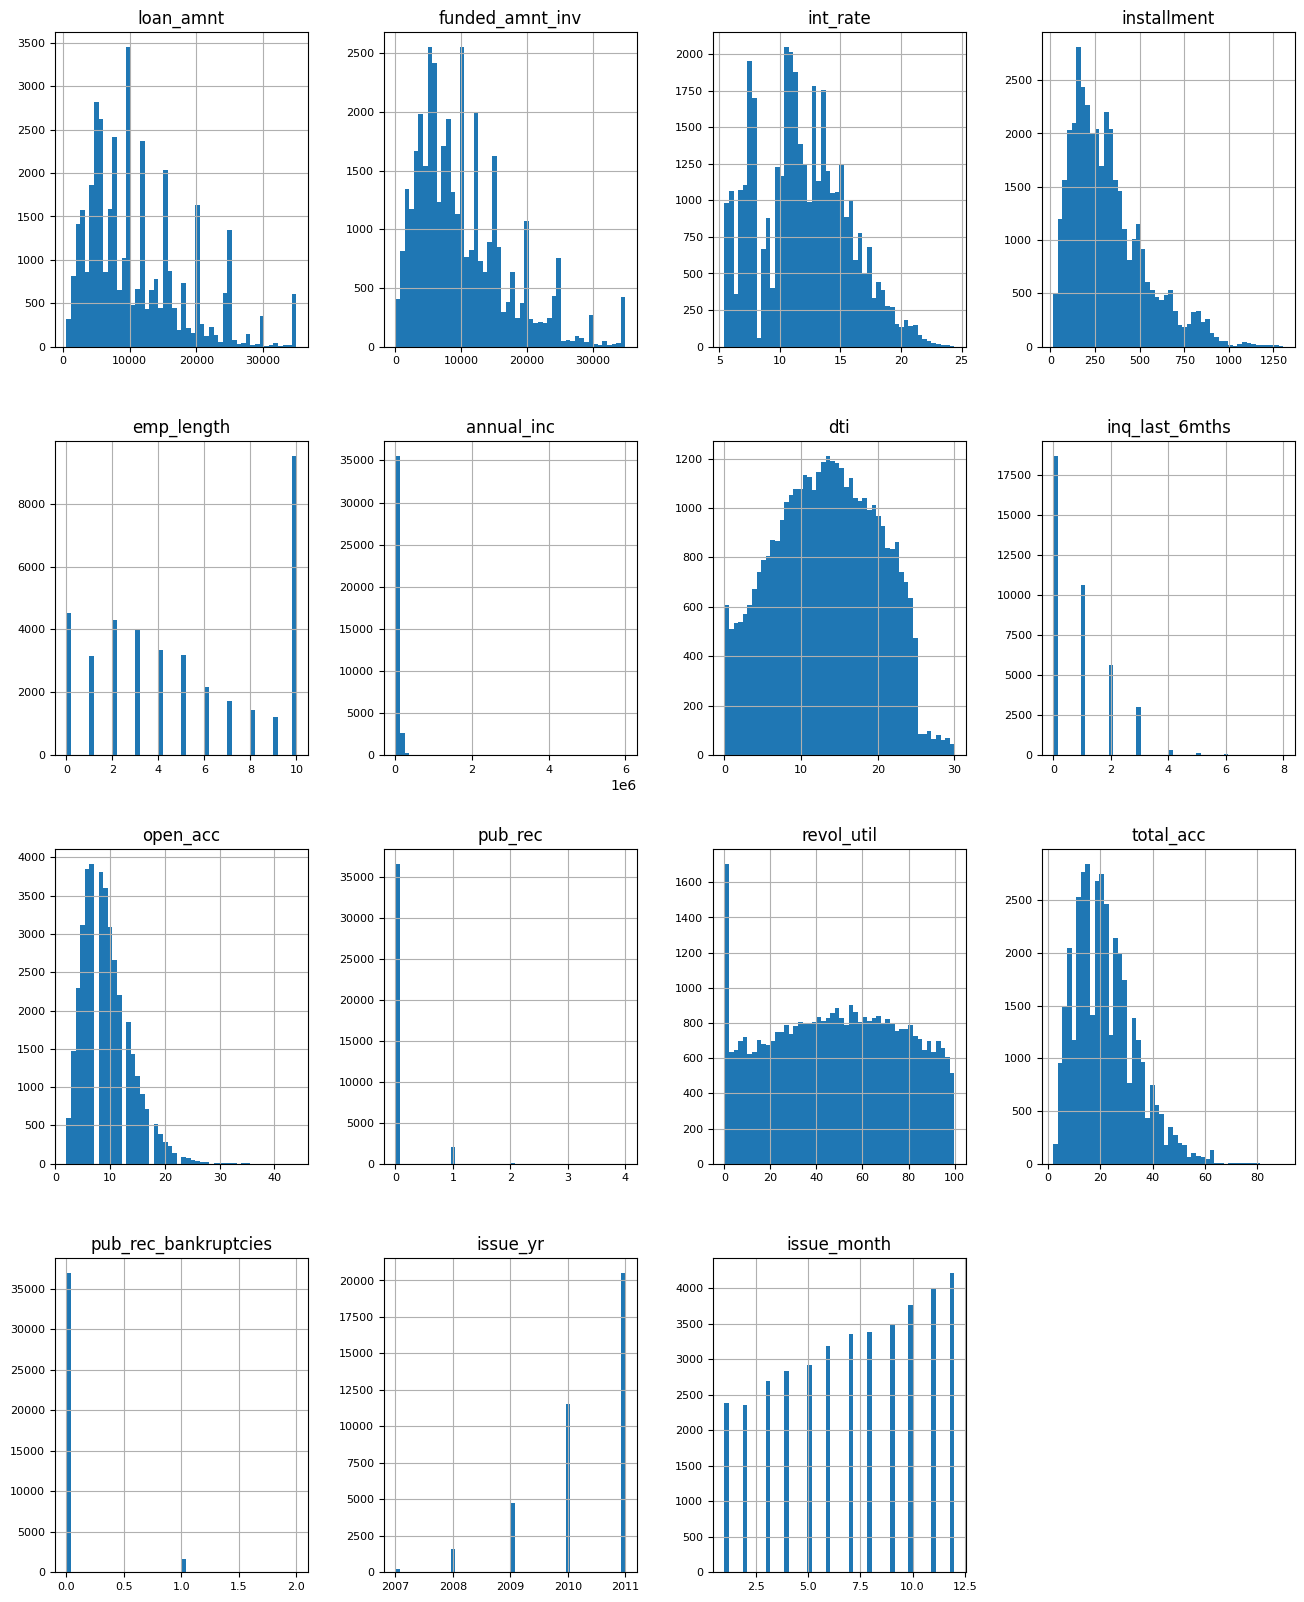

In [0]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

The histogram of the numerical distribution helps us to understand the below inferences,
- Columns which are heavily skewed are annual_inc,pub_rec,pub_rec_bankruptcies, this would need further outlier treatment

**Outlier Treatment**

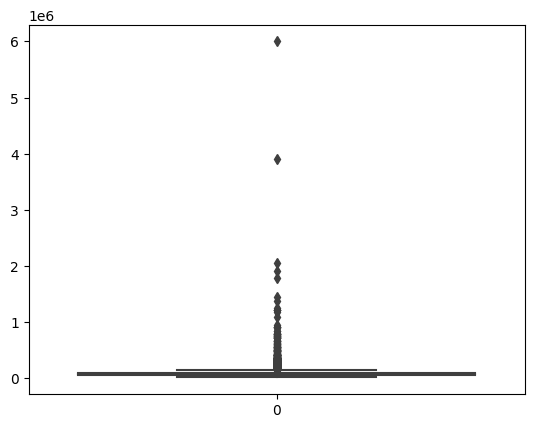

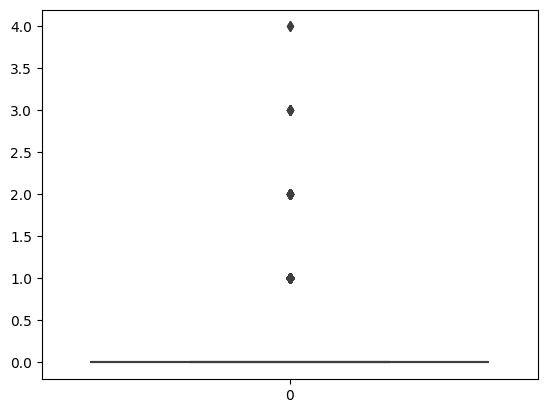

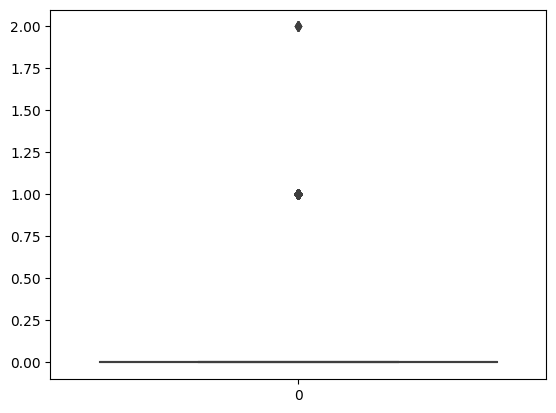

In [0]:
outliercols=['annual_inc','pub_rec','pub_rec_bankruptcies']
for i in outliercols:
    sns.boxplot(df[i])
    plt.show()

lets analyse the outlier for annual_inc column, the chart is very much compressed because of the outlier & the values are in scientific notation(le6)


In [0]:
pd.options.display.float_format = '{:.2f}'.format #helps to supress the scientific notation 
df.annual_inc.describe()

count   38577.00  
mean    68777.97  
std     64218.68  
min     4000.00   
25%     40000.00  
50%     58868.00  
75%     82000.00  
max     6000000.00
Name: annual_inc, dtype: float64

its clearly evident the max value (100th percentile) is skewed and way higher than rest of the income 
Lets evaluate the percentile of 80, 85,90,95 and so on to get an idea where the skeweness 

In [0]:
df.annual_inc.quantile([0.80,0.85,0.90,0.95,0.96,0.97,0.98,0.99])

0.80   90000.00 
0.85   100000.00
0.90   115000.00
0.95   140004.00
0.96   150000.00
0.97   165000.00
0.98   187000.00
0.99   234144.00
Name: annual_inc, dtype: float64

The below steps are followed to remove the outliers
1. Calculated the IQR 
2. Used the condition to filter out the values beyond the range 
3. Outlier dataframe is created and the same is used to drop the outlier values from the orginal dataframe

In [0]:
# calculate IQR for column Height
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['annual_inc'] < Q1 - threshold * IQR) | (df['annual_inc'] > Q3 + threshold * IQR)]
outliers

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_yr,issue_month
74,14400,14400.00,36 months,8.90,457.25,A,A5,0,OWN,150000.00,Source Verified,Fully Paid,debt_consolidation,NY,14.85,Dec-94,0,12,0,55.00,38,0.00,2011,12
80,35000,22050.00,60 months,17.27,551.84,D,D3,3,MORTGAGE,150000.00,Verified,Fully Paid,home_improvement,NY,7.51,Jun-03,1,11,0,53.30,31,0.00,2011,12
170,25000,25000.00,36 months,12.42,835.39,B,B4,2,RENT,225000.00,Verified,Fully Paid,debt_consolidation,NJ,8.32,Jul-04,0,11,0,34.60,23,0.00,2011,12
185,35000,35000.00,36 months,10.65,1140.07,B,B2,2,MORTGAGE,168000.00,Verified,Fully Paid,debt_consolidation,TX,3.17,Dec-02,1,16,0,1.40,22,0.00,2011,12
298,8000,8000.00,36 months,11.71,264.61,B,B3,1,RENT,150000.00,Not Verified,Fully Paid,credit_card,NY,2.48,Jul-96,0,5,0,56.20,8,0.00,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39694,5000,4150.00,36 months,7.43,155.38,A,A2,8,MORTGAGE,150000.00,Not Verified,Fully Paid,home_improvement,GA,0.00,Dec-87,0,2,0,19.50,19,0.00,2007,7
39703,3000,2550.00,36 months,10.28,97.20,C,C1,2,MORTGAGE,200000.00,Not Verified,Fully Paid,home_improvement,NY,0.00,Feb-97,0,5,0,0.00,8,0.00,2007,7
39706,5000,150.00,36 months,8.07,156.84,A,A4,0,MORTGAGE,180000.00,Not Verified,Fully Paid,home_improvement,WI,5.55,Jun-96,0,12,0,26.30,39,0.00,2007,7
39707,5000,525.00,36 months,9.33,159.77,B,B3,2,MORTGAGE,180000.00,Not Verified,Fully Paid,home_improvement,WI,11.93,Feb-95,1,16,0,39.20,38,0.00,2007,7


In [0]:
df1=df.drop(outliers.index)

In [0]:
outliers.annual_inc.describe()

count   1762.00   
mean    226731.04 
std     218010.04 
min     145008.00 
25%     159996.00 
50%     180000.00 
75%     225000.00 
max     6000000.00
Name: annual_inc, dtype: float64

In [0]:
df1.annual_inc.describe()

count   36815.00 
mean    61218.19 
std     28224.58 
min     4000.00  
25%     40000.00 
50%     56000.00 
75%     78000.00 
max     145000.00
Name: annual_inc, dtype: float64

In [0]:
df_curated=df1

<Axes: >

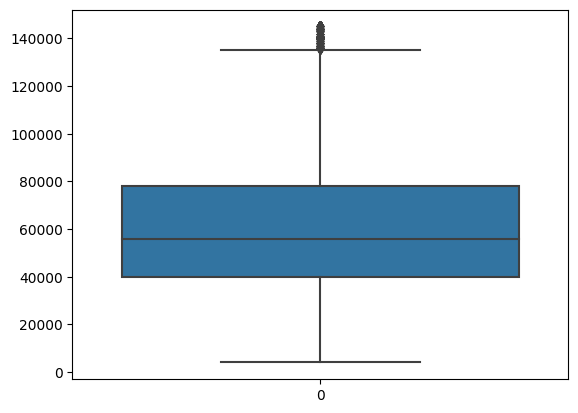

In [0]:
sns.boxplot(df_curated.annual_inc)

The above chart without outliers looks very much neat without the noise after removing the outliers using IQR approach

In [0]:
df.pub_rec.value_counts()

0    36507
1    2013 
2    48   
3    7    
4    2    
Name: pub_rec, dtype: int64

In [0]:
df.pub_rec_bankruptcies.value_counts()

0.00    36935
1.00    1637 
2.00    5    
Name: pub_rec_bankruptcies, dtype: int64

pub_rec and pub_rec_bankruptcies has more of discrete values , so better not to perform outlier treatment

**Univariate analysis using Categorial variable**

Univariate analysis can help to understand the distribution but it may not help to find the causation in all scenarios 

Q - what are the different categories of term and whats the most preferred term?
- Inference - 36 months more preferred compared to 60 months

<Axes: >

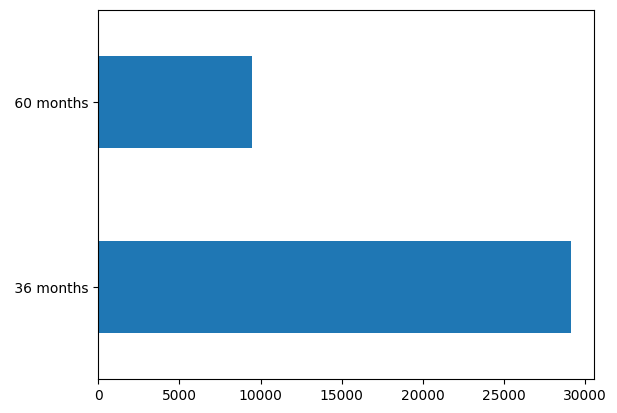

In [0]:
df.term.value_counts().plot.barh()

Loan grade is an important metric for the management to take decision on Approving/Rejecting the loan , and what int_rate has to be provided etc 
Lets do both univariate and bi-variate analysis to understand the interesting observation based out of this metric

Order of the load grading system,
A - Safer
...
...
...
G - Risker, so the understanding of the grade system is 

- More the safer , less the int_rate
- More the Risker, more the int_rate

It would be interesting to find which loan grade applications are getting more approved or defaulted 

Segregating the Fully Paid and Charged-off in two different dataframes would help us to get more insights

- Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
- Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

In [0]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off    5627 
Name: loan_status, dtype: int64

In [0]:
df_fullypaid = df[(df.loan_status=='Fully Paid')]
df_defaulted= df[(df.loan_status=='Charged Off')]

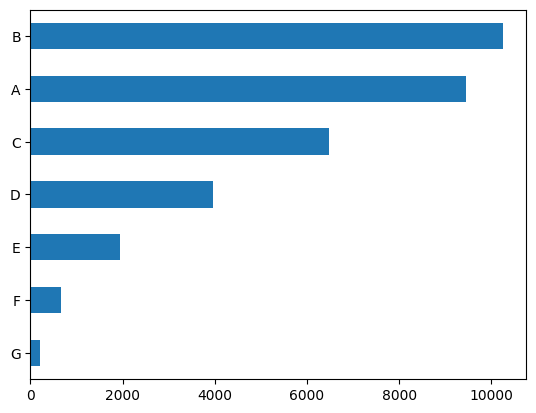

In [0]:
df_fullypaid.grade.value_counts().sort_values().plot.barh()
plt.show()

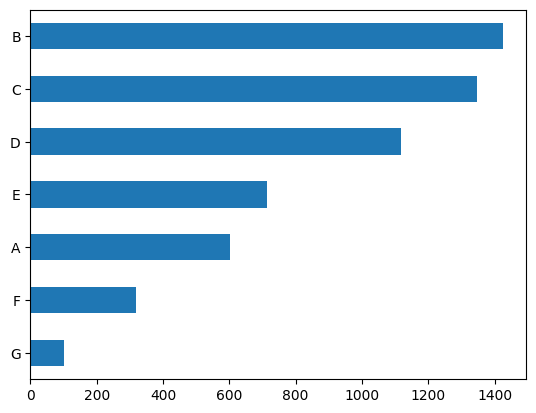

In [0]:
df_defaulted.grade.value_counts().sort_values().plot.barh()
plt.show()

By comparing the above two charts , its clearly evident , the loan grade which we considered less risker are the one who paid most of the loans and the very same category are the ones who defaulted the loans. So the grade assignment to qualify the appllication is less risker didn't helped or not accurate (This is an example of Univariate segmented analysis - Comparing one group with another, in our case defaulted vs fully paid)

We can treat the column emp_length as both categorical and numerical , lets treat it as categorical and analyse which category of employees are paying the loan and who is defaulting

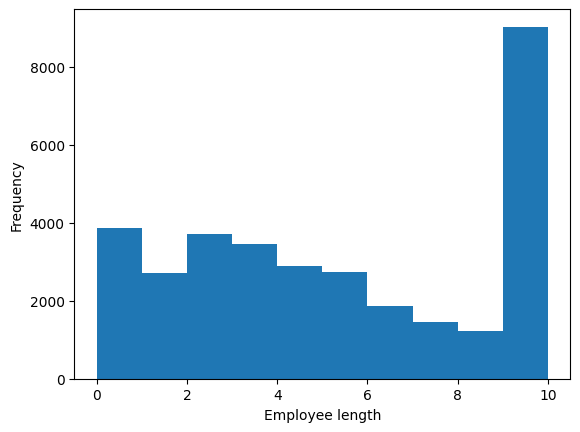

In [0]:
df_fullypaid.emp_length.plot.hist()
plt.xlabel("Employee length")
plt.show()

We can infer, 

- the experience category of 9-10 are the ones who paid most of the loans 

Lets repeat the same analysis for the defaulted group

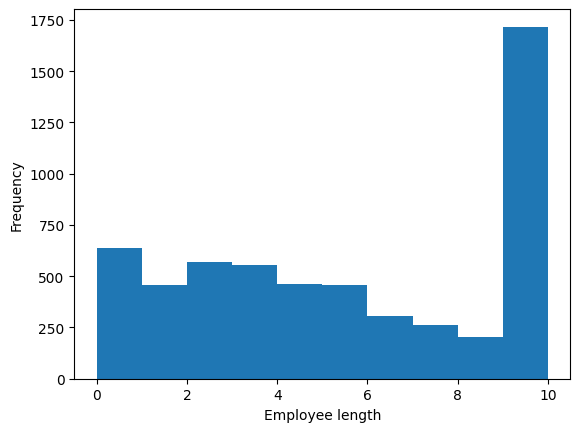

In [0]:
df_defaulted.emp_length.plot.hist()
plt.xlabel("Employee length")
plt.show()

We can infer,

the experience category of 9-10 are the ones who defaulted most of the loans

By comparing the defaulted vs paid group, in both the cases 9-10 experience category are the ones who paid and who defaulted most . So extra risk mitigation has to be taken by the bank to ensure the loan is approved for this group

In [0]:
df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN         2975 
OTHER       98   
NONE        3    
Name: home_ownership, dtype: int64

**Treating Missing Values** - The home ownership category shows None for 3 rows, since we have a category "Other", its better to mark the 'None' as 'Other' category

In [0]:
df.home_ownership=df.home_ownership.apply(lambda x: x if x not in ['NONE'] else 'OTHER') 
df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN         2975 
OTHER       101  
Name: home_ownership, dtype: int64

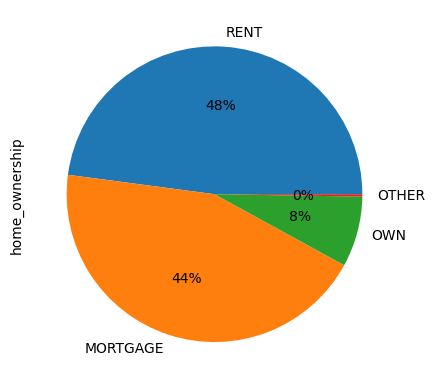

In [0]:
df.home_ownership.value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

Observation from the above chart is , the most amount of the loan applications are from the home_membership category of Rent and Mortage

From the data dict - The Verification_status Indicates if income was verified by LC, not verified, or if the income source was verified

So Source_Verified is not as same as Verified, we need to treat them as unique category

It would be interesting to analyse , the Verification_status with fully paid vs defaulted group

In [0]:
df.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified    9677 
Name: verification_status, dtype: int64

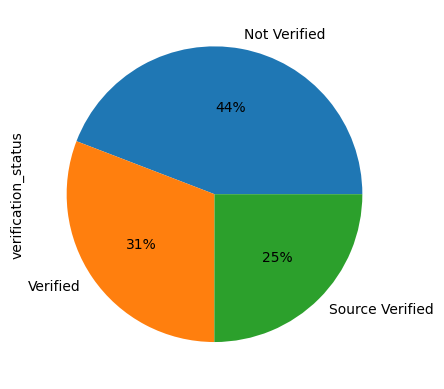

In [0]:
df_fullypaid.verification_status.value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

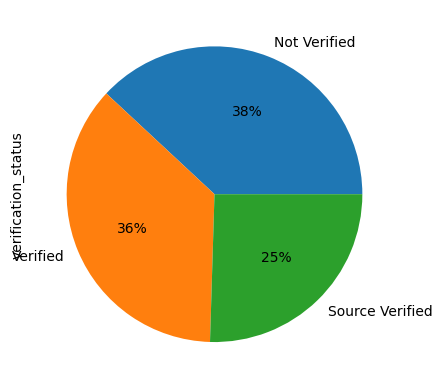

In [0]:
df_defaulted.verification_status.value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

The inference is regardless of income is verified or not , it did not gave any inference over loan getting defaulted or fully paid . Because , in both the case we could see Not-verfied is having close to equal share

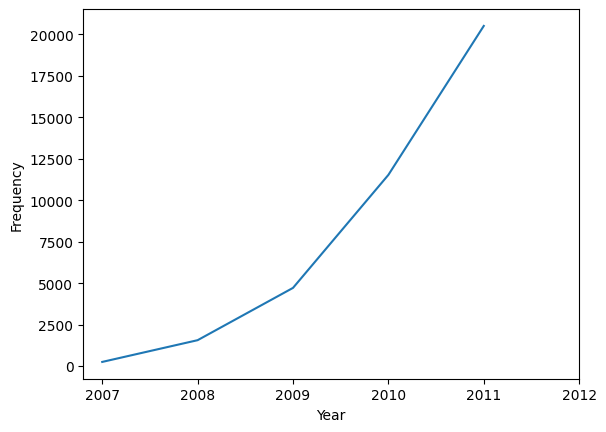

In [0]:
df_yearcounts=df.issue_yr.value_counts().reset_index()
ax=sns.lineplot(df_yearcounts,x='index',y='issue_yr')
ax.set(xlabel='Year', ylabel='Frequency')
ax.set_xticks(range(2007,2013))
plt.show()

Observation from the above chart is, the number of loans issued increased as the year increases

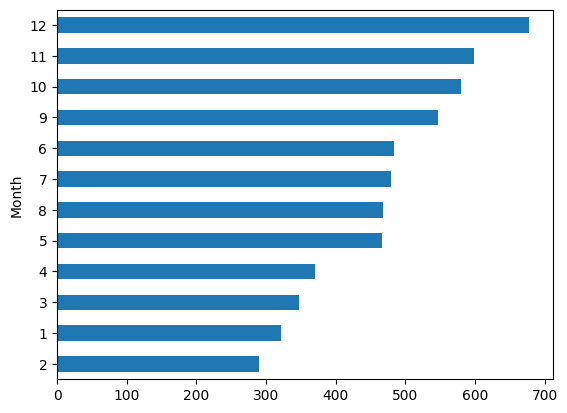

In [0]:
df_defaulted.issue_month.value_counts().sort_values().plot.barh()
plt.ylabel("Month")

plt.show()

Its intersting to observe the december month has more defaults compared to other months across all years

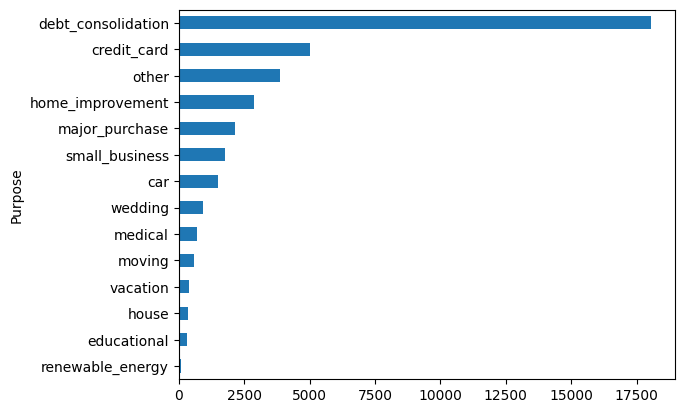

In [0]:
df.purpose.value_counts().sort_values().plot.barh()
plt.ylabel("Purpose")

plt.show()

The top most purpose for the loan application is Debt Consolidation 

Debt consolidation refers to taking out a new loan or credit card to pay off other existing loans or credit cards. By combining multiple debts into a single, larger loan,

**Univariate analysis for Numerical column**

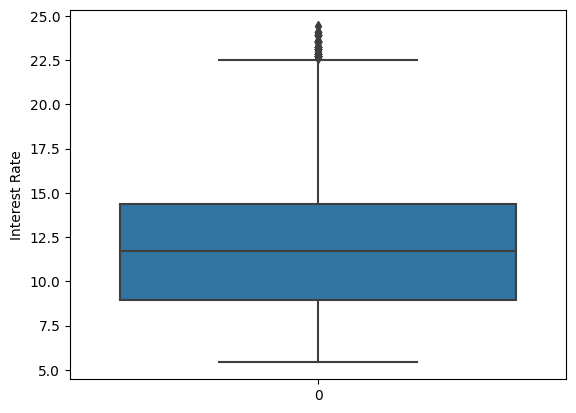

In [0]:
sns.boxplot(df.int_rate)
plt.ylabel("Interest Rate")

plt.show()

The median value of the int_rate is 12.5%
- 25th and 75th pencentile is 8.9 and 14.4 respectively
- The above box plot helps us to bucket the ranges of int_rate


**Bi-Variate Analysis** 

Lets analyse the relationship between grade vs int_rate - Categorical vs Numerical

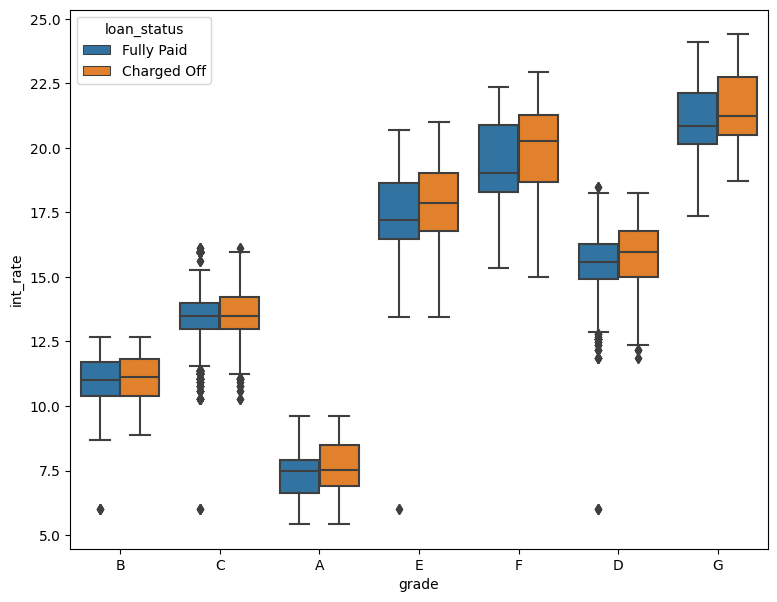

In [0]:
plt.figure(figsize=[9,7])
sns.boxplot(x=df['grade'], y=df['int_rate'],hue=df.loan_status)
plt.show()

The above Box plot clearly demonstrates , the int_rate is more when the grade is more risker such as Grade-G and int_rate is less for the safer loan application such as Grade-A . We can also notice, the quantiles (25th,50th,75th) values of charged-off is slightly higher than fully paid for every grade 

In [0]:
df_pivot=df[['grade','loan_status','int_rate']]
df_pivot=df_pivot.pivot_table(index='grade', columns='loan_status',values='int_rate', aggfunc='count')
#df_pivot['chargedOffRatio']=df_pivot['Charged Off'].sum(axis=0)/7 


In [0]:
df_pivot

loan_status,Charged Off,Fully Paid
grade,,
A,602,9443
B,1425,10250
C,1347,6487
D,1118,3967
E,715,1948
F,319,657
G,101,198


In [0]:
df_pivot['defaulted_ratio']=df_pivot['Charged Off']/(df_pivot['Charged Off'] + df_pivot['Fully Paid'])

In [0]:
df_pivot

loan_status,Charged Off,Fully Paid,defaulted_ratio
grade,,,
A,602,9443,0.06
B,1425,10250,0.12
C,1347,6487,0.17
D,1118,3967,0.22
E,715,1948,0.27
F,319,657,0.33
G,101,198,0.34


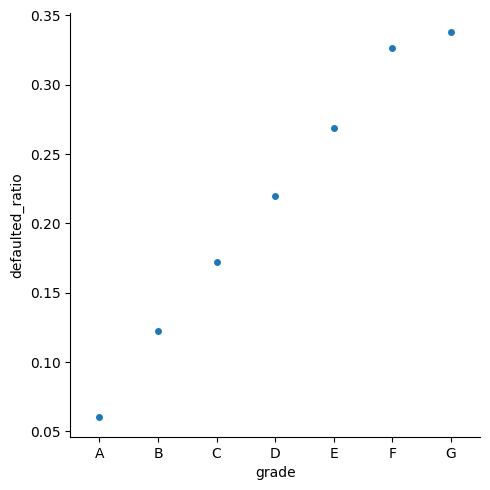

In [0]:
sns.catplot(df_pivot,x=df_pivot.index,y=df_pivot.defaulted_ratio)
plt.show()

The ratio analysis for the possibility of getting defaulted based on int_rate and grade concludes, the Grade G, F and E are the top most categories who has higher possibility of getting defaulted

In [0]:
df

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_yr,issue_month
0,5000,4975.00,36 months,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70,9,0.00,2011,12
1,2500,2500.00,60 months,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.40,4,0.00,2011,12
2,2400,2400.00,36 months,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.50,10,0.00,2011,12
3,10000,10000.00,36 months,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21.00,37,0.00,2011,12
5,5000,5000.00,36 months,7.90,156.46,A,A4,3,RENT,36000.00,Source Verified,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,0,28.30,12,0.00,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.00,36 months,8.07,78.42,A,A4,4,MORTGAGE,110000.00,Not Verified,Fully Paid,home_improvement,CO,11.33,Nov-90,0,13,0,13.10,40,0.00,2007,7
39713,8500,875.00,36 months,10.28,275.38,C,C1,3,RENT,18000.00,Not Verified,Fully Paid,credit_card,NC,6.40,Dec-86,1,6,0,26.90,9,0.00,2007,7
39714,5000,1325.00,36 months,8.07,156.84,A,A4,0,MORTGAGE,100000.00,Not Verified,Fully Paid,debt_consolidation,MA,2.30,Oct-98,0,11,0,19.40,20,0.00,2007,7
39715,5000,650.00,36 months,7.43,155.38,A,A2,0,MORTGAGE,200000.00,Not Verified,Fully Paid,other,MD,3.72,Nov-88,0,17,0,0.70,26,0.00,2007,7


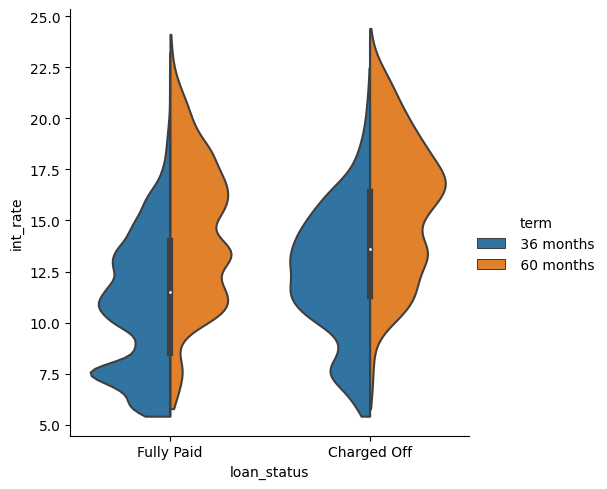

In [0]:
sns.catplot(data=df, x="loan_status", y="int_rate", hue="term", kind="violin",cut=0,split=True)
plt.show()

The above chart clearly indicates the 60 months term has more possibilities of getting defaulted comparted to the 36 months term

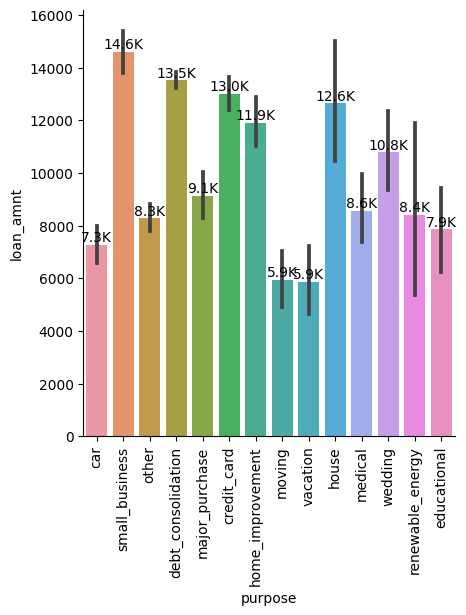

In [0]:
g=sns.catplot(data=df_defaulted, x="purpose", y="loan_amnt", kind="bar")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.xticks(rotation=90)


plt.show()

The dataset is filtered only with defaulted loans and we could observe the small_business category take high loan and being the top most category of getting defaulted and the second top most is debt_consolidation

In [0]:
df_defaulted[['loan_amnt','dti']].corr()

,loan_amnt,dti
loan_amnt,1.00,0.06
dti,0.06,1.00


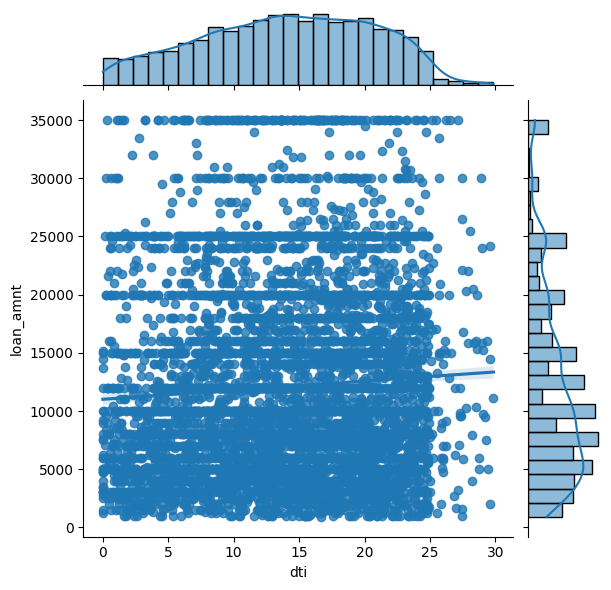

In [0]:
sns.jointplot(
    data=df_defaulted, x="dti", y="loan_amnt",kind="reg")
plt.show()

The dti is The debt-to-income (DTI) ratio is the percentage of your gross monthly income that goes to paying your monthly debt payments and is used by lenders to determine your borrowing risk.

The above chart represents , DTI is weakly correlated with loan_amnt for the defaulted applications

In [0]:
df_defaulted[['annual_inc','dti']].corr()

,annual_inc,dti
annual_inc,1.00,-0.09
dti,-0.09,1.00


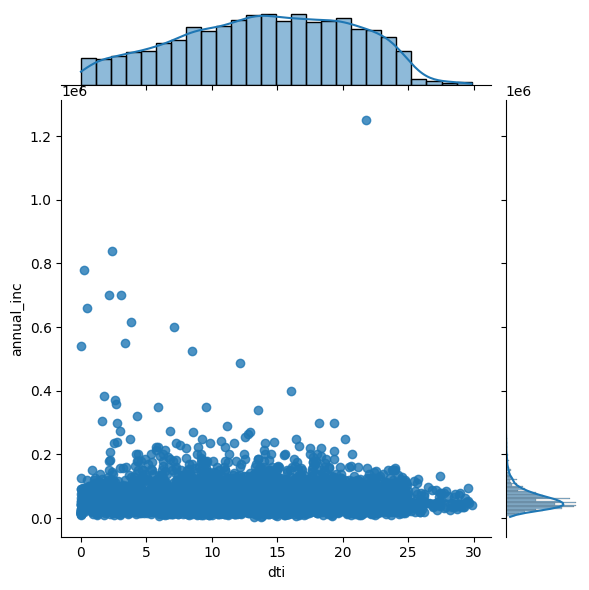

In [0]:
sns.jointplot(
    data=df_defaulted, x="dti", y="annual_inc",kind="reg")
plt.show()

The above chart express that the dti is negatively correlated with annual income

Lets analyse int_rate and annual_inc have any relationship, one of the way to identify is to use jointplot and draw the regression line to check whether the line meets the points , the below chart shows there is a weaker correlation between int_rate and annual_inc

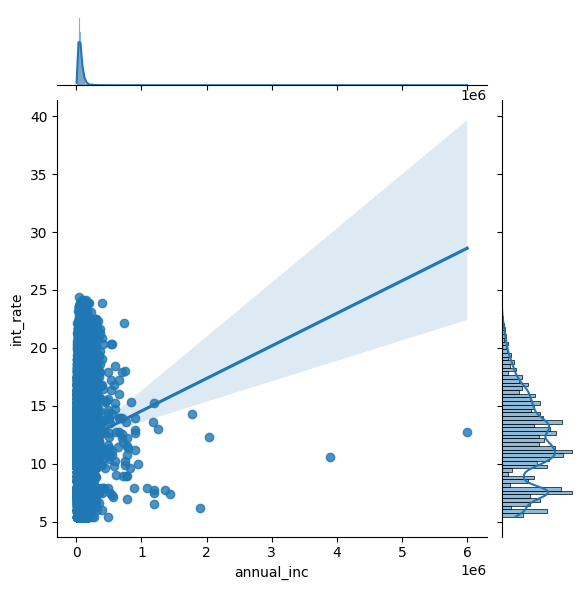

In [0]:
sns.jointplot(data=df, y="int_rate", x="annual_inc", kind="reg")
plt.show()

Lets find the relationship between purpose vs loan_amt

In [0]:
import plotly.express as px
df_pur=df_defaulted.groupby(['purpose'])['loan_amnt'].sum().reset_index()

fig = px.scatter(df_pur, x="purpose", y="loan_amnt",size='loan_amnt'
	         
                , size_max=60)
fig.show()

The above bubble chart clearly explains the sum of the loan amount is higher for dept_consolidation and we have only defaulted data points in the dataset. 

heatmap helps to find the correlation of multiple variables at the same time 

In [0]:
df_num = df.select_dtypes(include = ['float64', 'int64']) #filtering only the numerical values 
df_num.head()

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_yr,issue_month
0,5000,4975.00,10.65,162.87,10,24000.00,27.65,1,3,0,83.70,9,0.00,2011,12
1,2500,2500.00,15.27,59.83,0,30000.00,1.00,5,3,0,9.40,4,0.00,2011,12
2,2400,2400.00,15.96,84.33,10,12252.00,8.72,2,2,0,98.50,10,0.00,2011,12
3,10000,10000.00,13.49,339.31,10,49200.00,20.00,1,10,0,21.00,37,0.00,2011,12
5,5000,5000.00,7.90,156.46,3,36000.00,11.20,3,9,0,28.30,12,0.00,2011,12


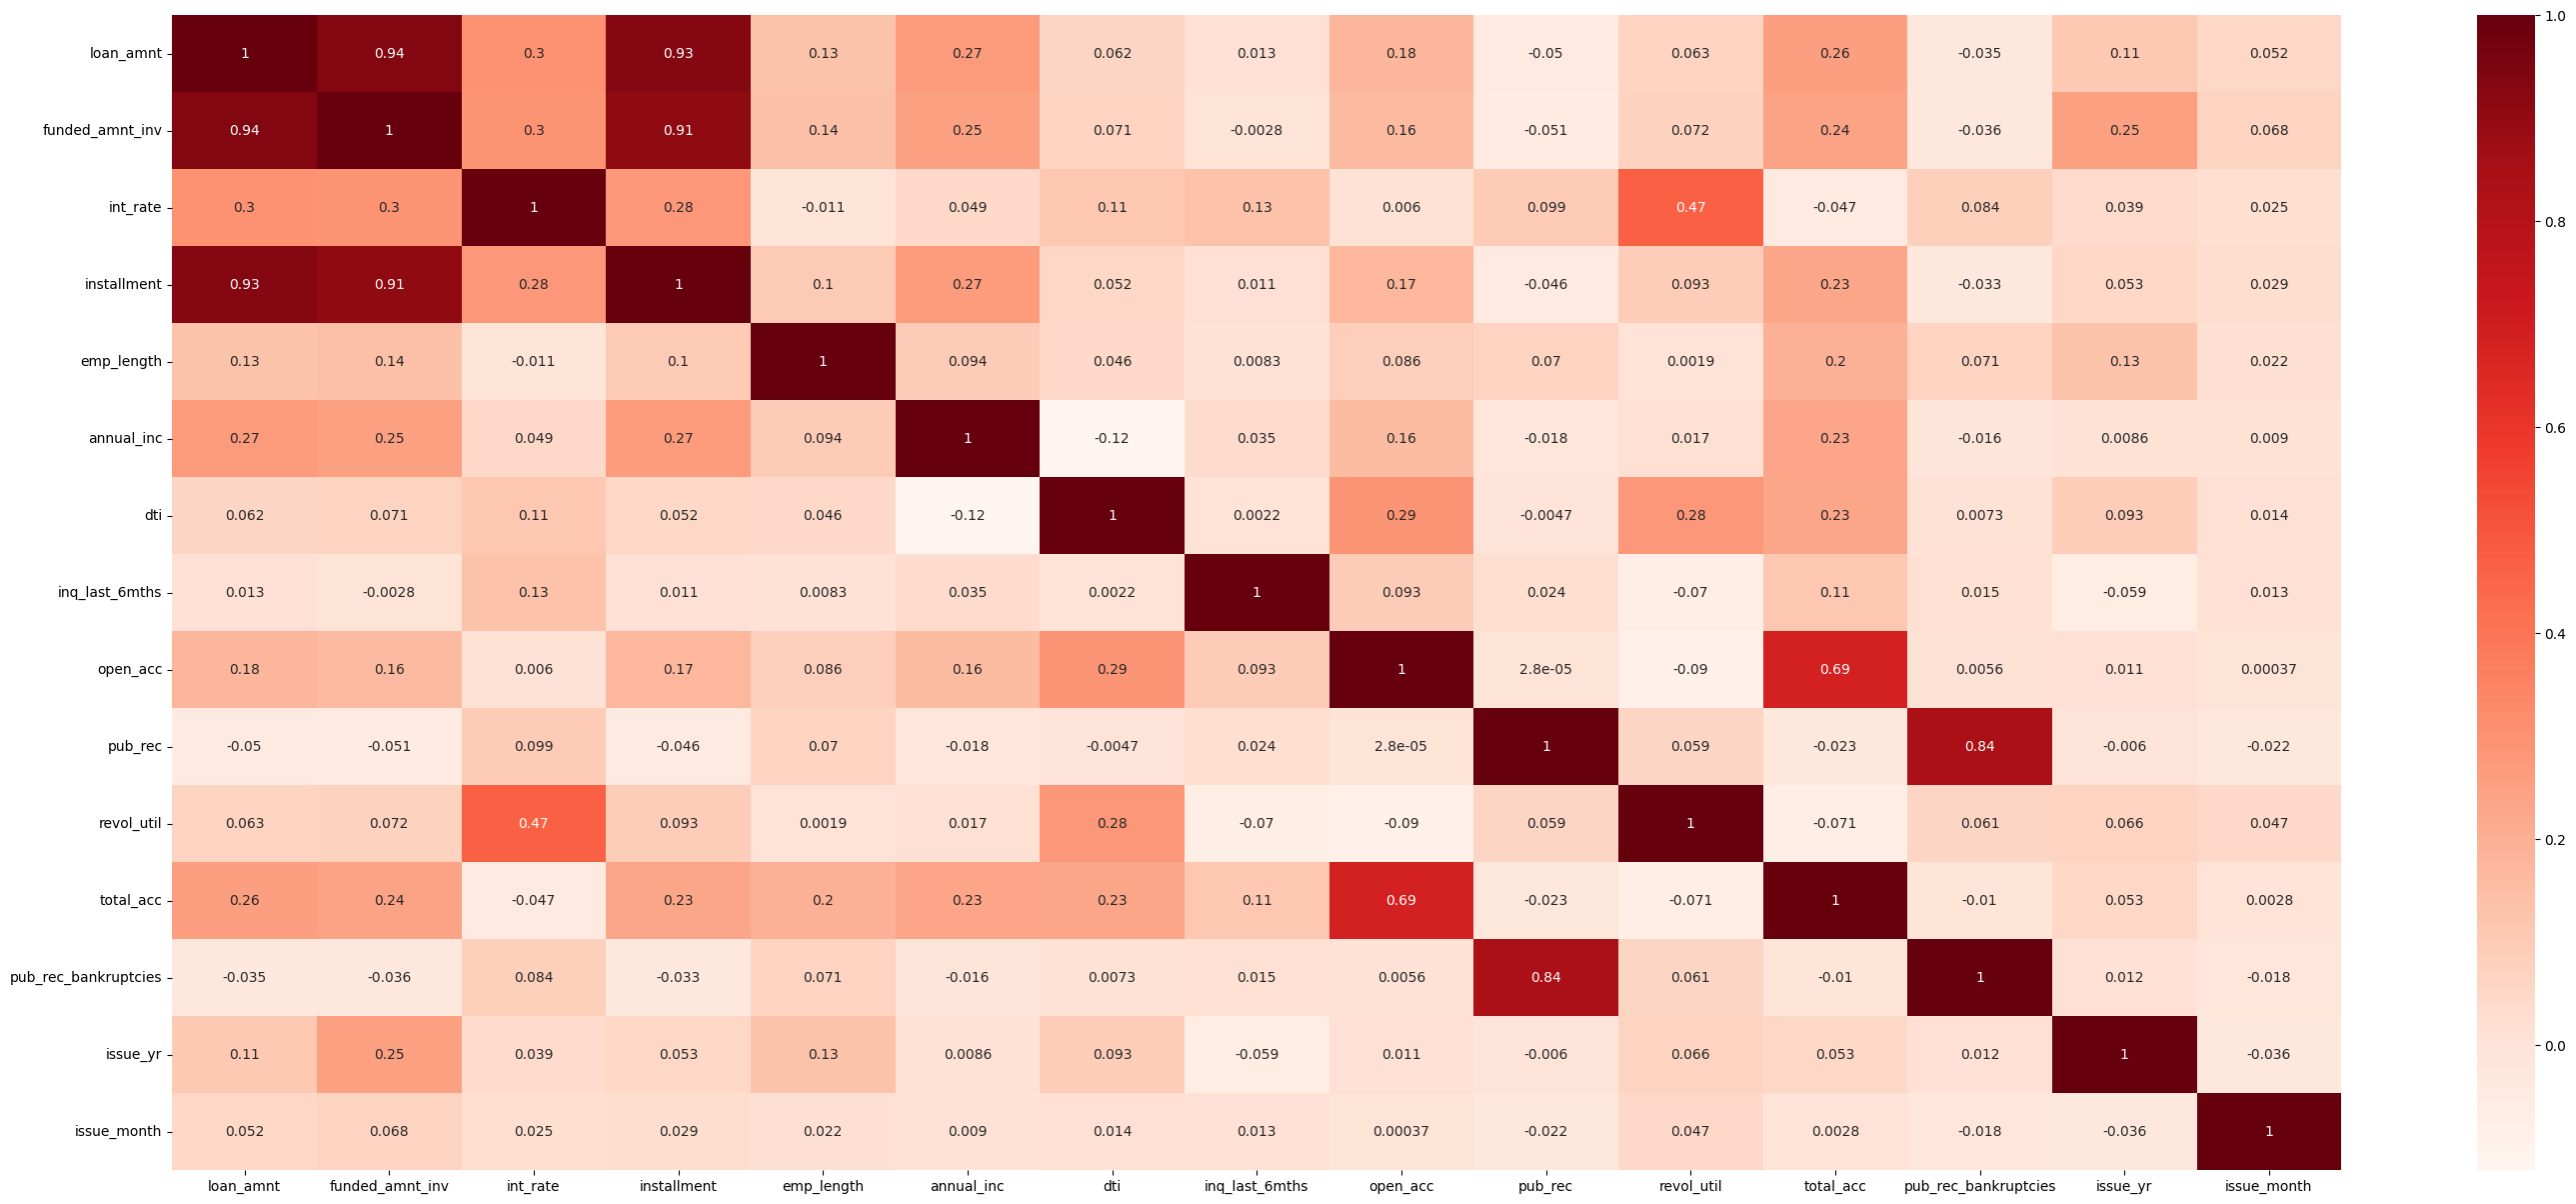

In [0]:
df_num_corr=df_num.corr()
plt.figure(figsize=[35,15])
sns.heatmap(df_num.corr(),cmap='Reds',annot=True)
plt.show()

Though the above chart shows good number of features with correlation , it looks exhaustive and we dont need features which are less correlated. Lets filter down by selecting the features which are correlated > 50% 

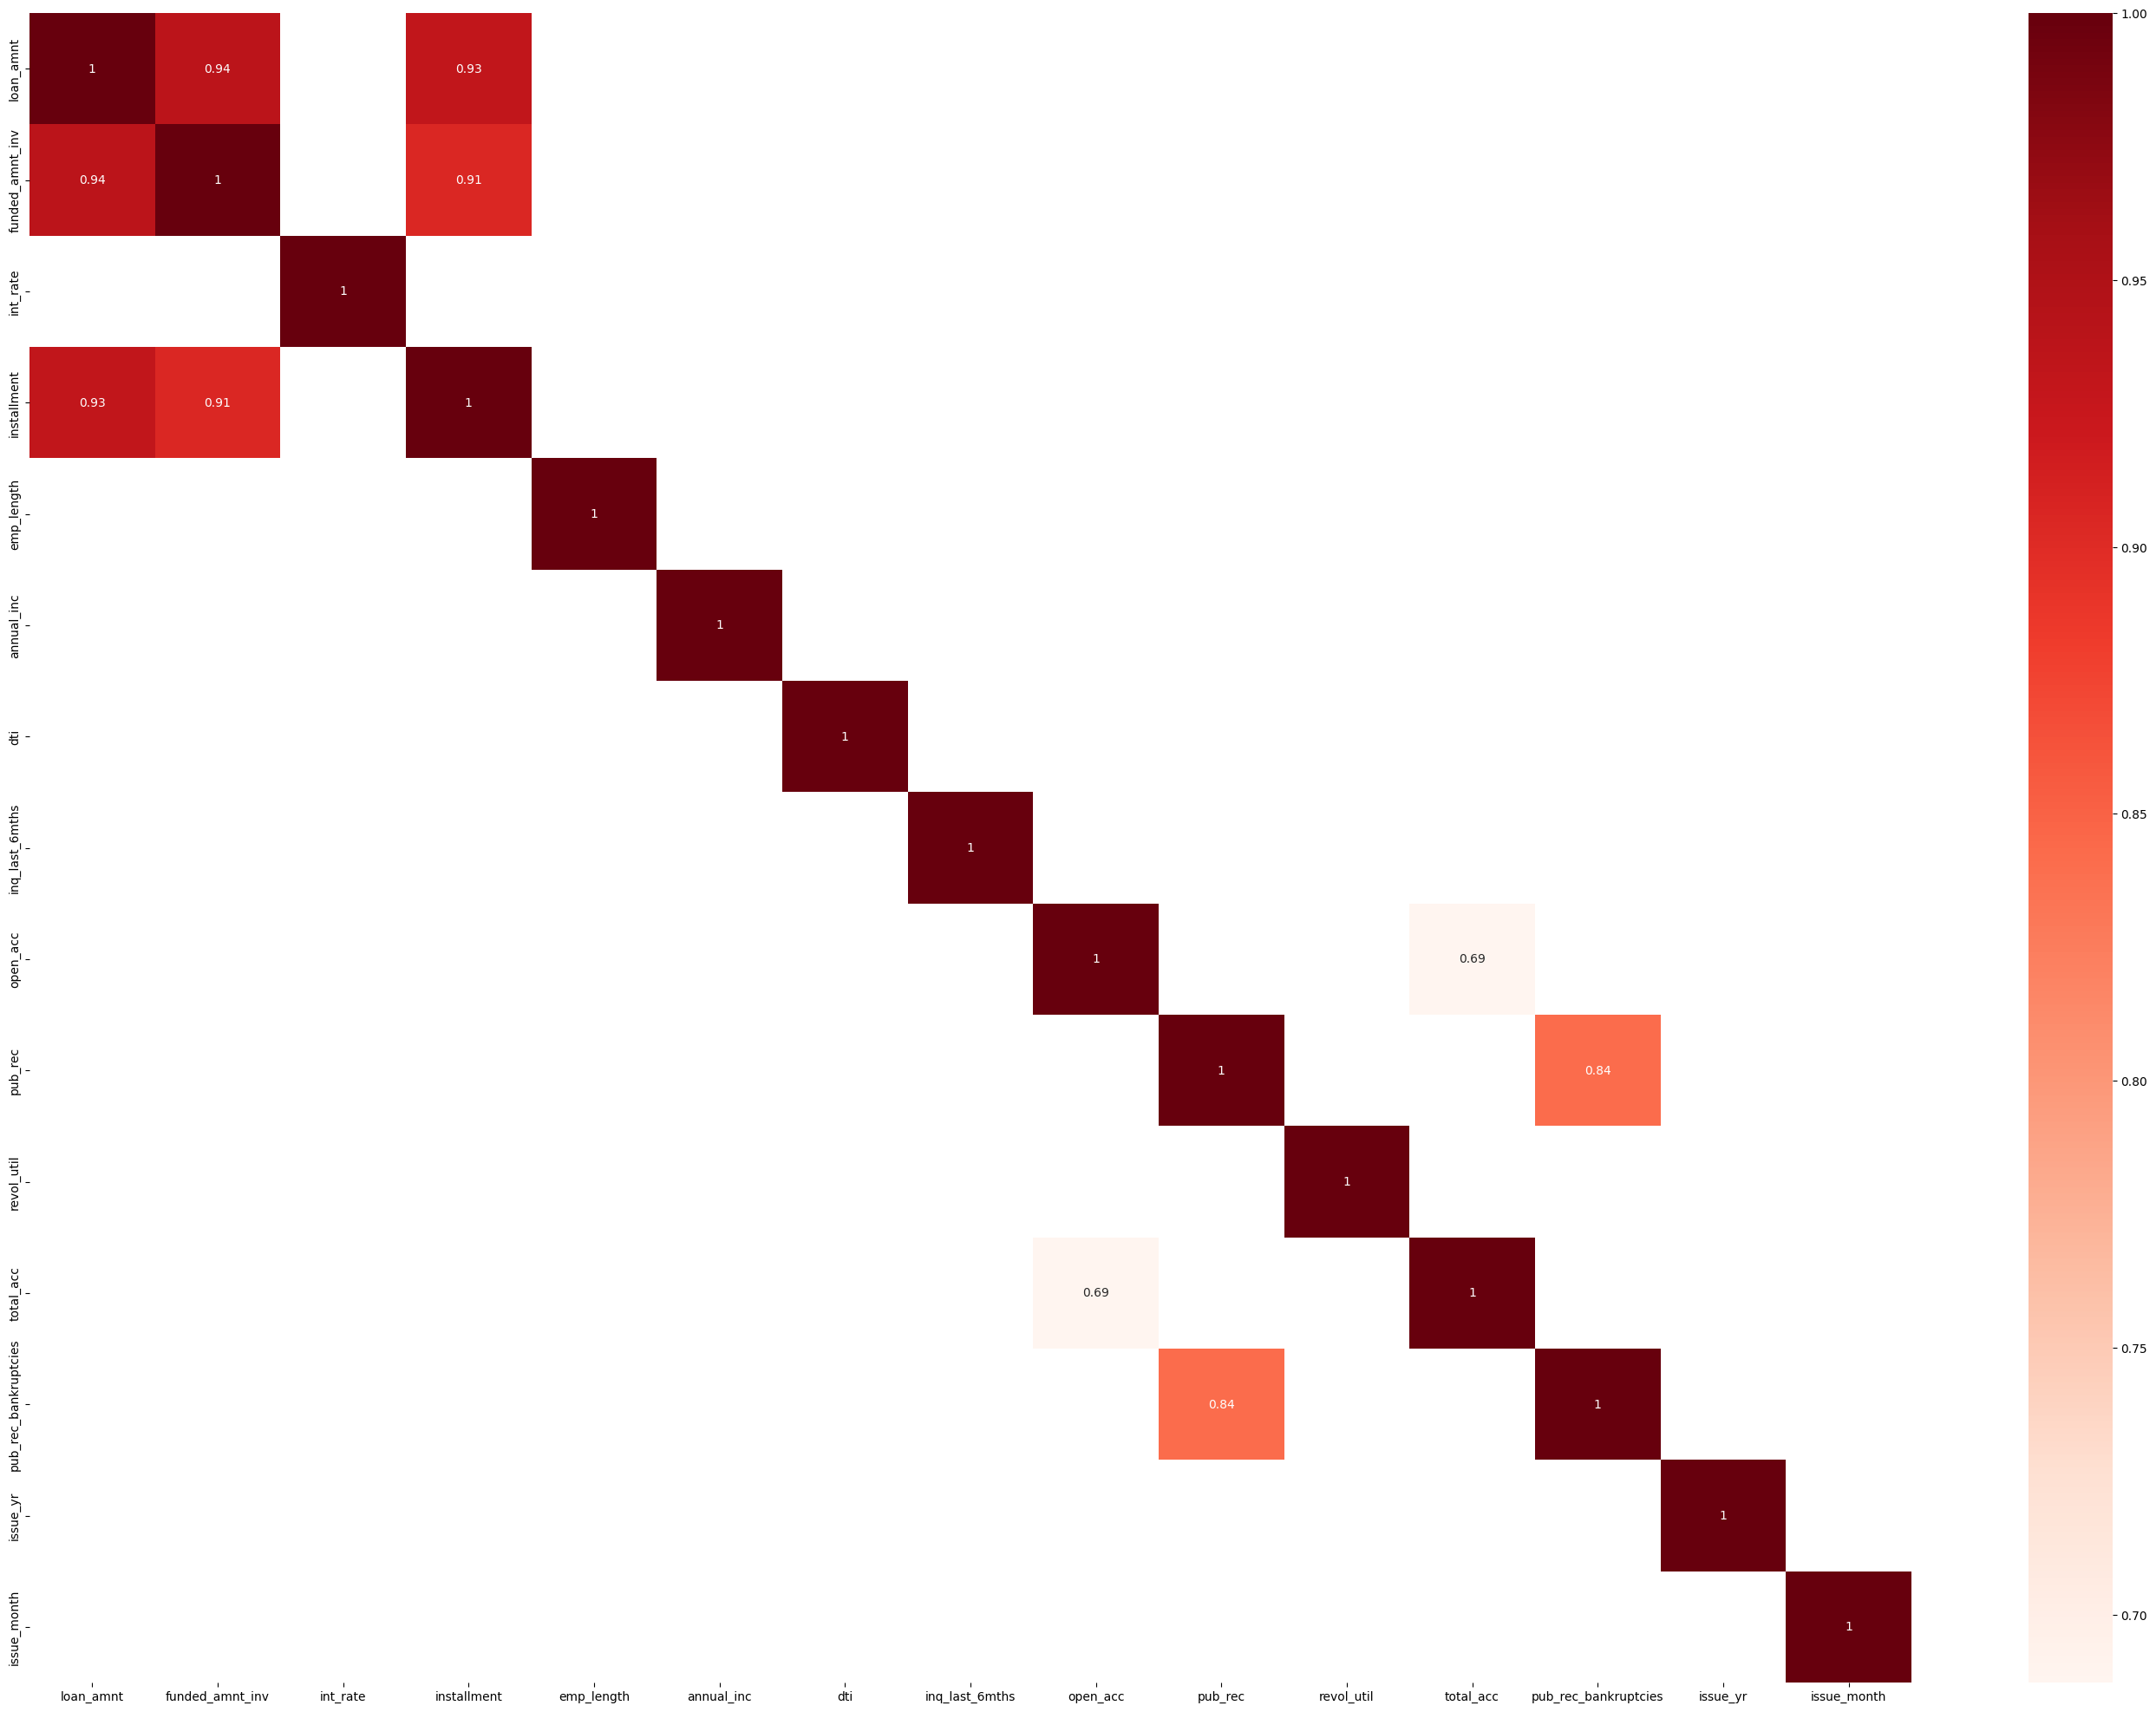

In [0]:
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5]
plt.figure(figsize=[35,25])
sns.heatmap(golden_features_list,cmap='Reds',annot=True)
plt.show()

In [0]:
golden_features_list

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_yr,issue_month
loan_amnt,1.00,0.94,NaN,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.94,1.00,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,0.93,0.91,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inq_last_6mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,0.69,NaN,NaN,NaN
pub_rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,0.84,NaN,NaN


The correlation doesnt prove causation (Understanding the domain and logically reasoning would provide more insights)

In [0]:

golden_features_list=golden_features_list.sum(axis=1)
golden_features_list=golden_features_list.where(golden_features_list>1).dropna()
print("The final Golden features in the numerical types are : ")
for i,j in enumerate(golden_features_list.index):
    
    print(str(i+1) + "- " + str(j))

The final Golden features in the numerical types are : 
1- loan_amnt
2- funded_amnt_inv
3- installment
4- open_acc
5- pub_rec
6- total_acc
7- pub_rec_bankruptcies


In [0]:
df_cat = df.select_dtypes(include = ['O']) #filtering only the numerical values 
print("The final Golden features in the Category types are : ")
for i,j in enumerate(df_cat):
    print(str(i+1) + "- " + str(j))
print("The other column which has influence over the loan status is emp_length")    

The final Golden features in the Category types are : 
1- term
2- grade
3- sub_grade
4- home_ownership
5- verification_status
6- loan_status
7- purpose
8- addr_state
9- earliest_cr_line
The other column which has influence over the loan status is emp_length


**EDA may not need to be single time activity , the process can be iterative. When we discover more amont of columns are removed and more missing values . The recommended approach is to find a way to bring the data, though its costly , the true insights can be derived only when we have more data with valid values**